In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

import displayData as dd
import predict as pd


In [2]:
plt.ion()

# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 input images of Digits
hidden_layer_size = 25  # 25 hidden layers
num_labels = 10         # 10 labels, from 0 to 9
                        # Note that we have mapped "0" to label 10

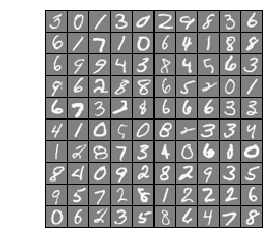

In [3]:
# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
data = scio.loadmat('ex3data1.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
selected = X[rand_indices[0:100], :]

dd.display_data(selected)

In [4]:
# ===================== Part 2: Loading Parameters =====================
# In this part of the exercise, we load some pre-initiated
# neural network parameters

print('Loading Saved Neural Network Parameters ...')

data = scio.loadmat('ex3weights.mat')
theta1 = data['Theta1']
theta2 = data['Theta2']

Loading Saved Neural Network Parameters ...


In [5]:
import numpy as np
from sigmoid import *

def predict(theta1, theta2, x):
    # Useful values
    m = x.shape[0]
    num_labels = theta2.shape[0]
    
    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned neural network. You should set p to a
    #                1-D array containing labels between 1 to num_labels.
    #
    h1 = np.c_[np.ones(m), x] @ theta1.T
    z1 = sigmoid(h1)
    h2 = np.c_[np.ones(m), z1] @ theta2.T
    z2 = sigmoid(h2)
    p = np.argmax(z2, axis=1)+1
    

    return p

In [6]:
# ===================== Part 3: Implement Predict =====================
# After training the neural network, we would like to use it to predict
# the labels. You will now implement the "predict" function to use the
# neural network to predict the labels of the training set. This lets
# you compute the training set accuracy.

# pred = pd.predict(theta1, theta2, X)
pred = predict(theta1, theta2, X)

print('Training set accuracy: {}. Correct number: 97.5'.format(np.mean(pred == y)*100))

Training set accuracy: 97.52. Correct number: 97.5


Displaying Example image
Neural network prediction: [6] (digit [6])
Displaying Example image
Neural network prediction: [4] (digit [4])
Displaying Example image
Neural network prediction: [5] (digit [5])
Displaying Example image
Neural network prediction: [6] (digit [6])
Displaying Example image
Neural network prediction: [4] (digit [4])
Displaying Example image
Neural network prediction: [2] (digit [2])
Displaying Example image
Neural network prediction: [9] (digit [9])
Displaying Example image
Neural network prediction: [6] (digit [6])
Displaying Example image
Neural network prediction: [4] (digit [4])
Displaying Example image
Neural network prediction: [8] (digit [8])


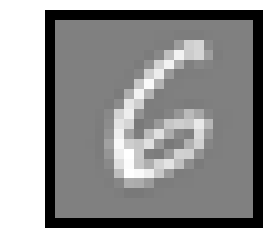

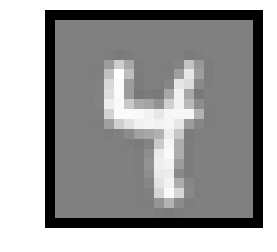

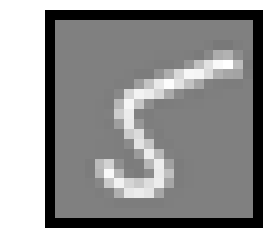

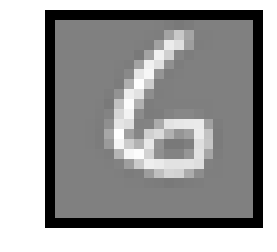

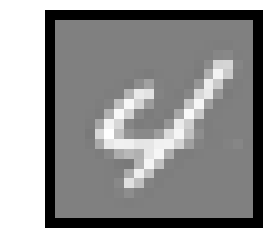

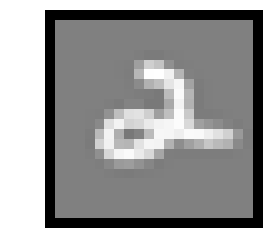

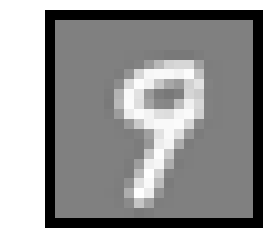

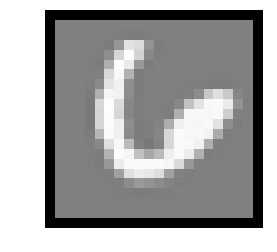

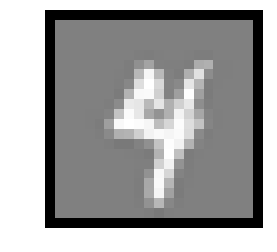

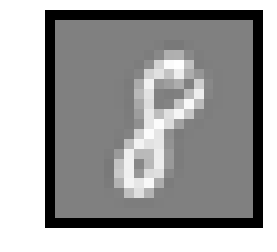

In [7]:
# To give you an idea of the network's output, you can also run
# thru the examples one at a time to see what it is predicting
def getch():
    import termios
    import sys, tty

    def _getch():
        fd = sys.stdin.fileno()
        old_settings = termios.tcgetattr(fd)
        try:
            tty.setraw(fd)
            ch = sys.stdin.read(1)
        finally:
            termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
        return ch

    return _getch()

# Randomly permute examples
rp = np.random.permutation(range(m))
for i in range(10):
    print('Displaying Example image')
    example = X[rp[i]]
    example = example.reshape((1, example.size))
    dd.display_data(example)

    # pred = pd.predict(theta1, theta2, example)
    pred = predict(theta1, theta2, example)
    print('Neural network prediction: {} (digit {})'.format(pred, np.mod(pred, 10)))

    